# Lecture 15

## Statistical / Phrase-Based Machine Translation (MT)

### Encoder-Decoder for MT
* Neural Network encodes input into a single vector word embedding, then uses input as well as encoding in order to decode
* Issue: may be difficult to encode entire history/context of a word into a single vector

### Transformers
* Encode the input sequence using a stack of N encoders
* Decoders then take in encoded input representations (words + encoded context) and generate 1 output word at a time, based on the encoded input and the previous outputs
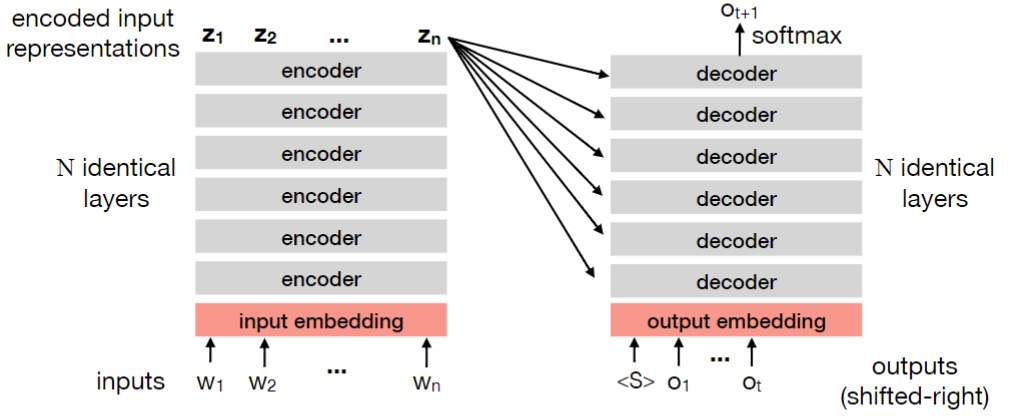

### Vauquois Triangle
* Different approaches to machine translation (between languages)
* Aim was to translate a source text into an "Interlingua" or a representation of the concepts in the original text, and then translate from the "Interlingua" to a target language
* Now, approach is to simply translate from source to target language


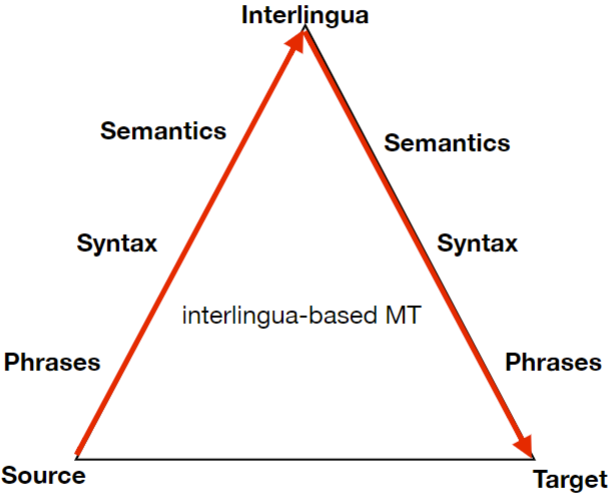

### Faithfulness and Fluency
* Good translation needs to achieve:
    * Faithful: target sentence should have the same content as the source text
    * Fluent: target text should be grammatical / natural / fluent in the target language
* Trade-off between faithfulness and fluency

### Fluency
* **Fluency:** Assume a translation system produces the following output candidates:
    1. The car near crash to me
    2. The car almost hit me
* Option (2) would be selected due to fluency
* However, may not be the most faithful translation

### Noisy Channel Model
* Aim: to translate text from another language into English
* Solution: assume that the text was initially written in English, then encoded in another language -- try to find the text in English that is most likely to lead to the given translation
 

* Goal: Given an observation in the **source language** (F), determine what was said in the **target language** (E)
* Fluency is modeled by P(E), and faithfulness by P(F | E)
* Apply Bayes Rule: $P(E | F) \propto P(E) P(F|E)$

### Word Alignments: IBM Model 2
* Simplifying assumption: alignments are one-to-many (each foreign word $f$ originates from exactly one English word $e$)
* Use alignment variables $a_1, ..., a_m$ to indicate the position that each word in $f$ is aligned to
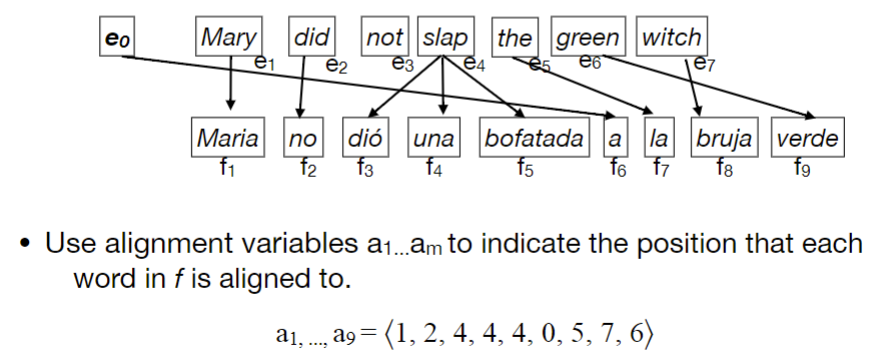

### IBM Model 2
* We can use the alignment variables to define a "mini translation model"
$$ P(F | E) = \sum_{A} P(F, A | E) $$
* Decoding problem: find English sequence E such that:
$$ \arg \max_E P(E) P(F | E)$$
* This is not used for translation in practice, but forms the basis for computing alignments


* Want to model the conditional probability:
$$ P(F, A | E) = P(f_1, ..., f_m, a_1, ..., a_m | e_1, ..., e_l, m) $$

* Probability is made of 2 parameters:
    * $t(f | e)$ is the probability of generating word $f$ from $e$
    * $q(j | i, l, m)$ is the probability that alignment variable $i$ takes values $j$ given sentence length $m$ and $l$
    
    
* Define the conditional probability for the target sentence and alignments as:
$$ P(f_1, ..., f_m, a_1, ..., a_m | e_1, ..., e_l, m) = \prod_{i = 1}^m q(a_i | i, l, m) t(f_i | e_{a_i})
$$

### Computing Alignments
* Assumption: alignments {$a_i$} are independent
* Want to compute the optimal alignments given a sentence pair:


$$ \arg \max_{a_1, ..., a_m} P(a_1 ... a_m | f_1 ... f_m, e_1 ... e_l, m) $$


$$ a_i = \arg \max_{j \in \{0...\}} q(j | i, l, m) t(f_i, e_j) $$

where $i = 1, ..., m$

### Parallel Corpora
* To train a model to compute alignments and conduct machine translation -- need parallel corpora (same text written in multiple languages)

### Training the Model -- Fully Observable Case
* In reality, we only get (E/F) pairs for training (words and translation into another language)
* We do not know the alignments ("partially observed data")
* If we knew the alignments, then we could estimate:

$$ t(f | e) = \frac{count(e, f)}{count(e)}
$$

$$ q(j | i, l, m) = \frac{count(j | i, l, m)}{count(i, l, m)}
$$

### MT Evaluation
* MT Evaluation is notoriously difficult
* No single correct output (typically use multiple reference translations)
* Need to evaluate faithfulness and fluency, but both are subjective
* Can use humans to evaluate the correctness of machine translation -- however, requires humans to be fluent in both languages, expensive, slow
* Wide range of different automatic metrics (BLEU, NIST, TER, METEOR)

### BLEU Metric
* Bilingual Evaluation Understudy
* Modified n-gram precision with length penalty (recall is ignored)
* Quick, inexpensive, and language independent
* Correlates highly with human evaluations
* Issues: bias against synonyms and inflectional variations (if a translation uses a synonym, will be marked completely incorrect), penalizes variations in word-orer between languages in different families

### BLEU: Brevity Penalty
* BLEU is precision based, and dropped words are not penalized
* Small (but accurate) machine translations may inflate the accuracy of the BLEU score, when in reality the translation is too short to reflect the meaning of the original text (ex. "colorless green ideas sleep furiously" and "green" would have a 1/5 unigram score but the translation does not reflect a similar meaning whatsoever)


* Utilize a **brevity penalty** for translations that are shorter than reference translations
* Let $c$ be the length of the candidate translation and $r$ be the length of the reference translation that has the closest length

$$ BP = \begin{cases} 1 & \text{if } c > r \\
e^{(1 - r/c)} & \text{if } c \leq r
\end{cases}
$$

$$ BLEU = BP \cdot \exp\biggl( \sum_{n = 1}^N \frac{1}{n} \log \text{precision}_n \biggr) $$